In [65]:
import tensorflow as tf
import numpy as np

In [66]:
#Avoid OOM errors by setting GPU memory consumption growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)

In [67]:
base_dir = r"C:\Users\nar21\OneDrive\Desktop\One Big Thing Project\ML Model Stuff\augImages"

In [68]:
subdirectories = [name for name in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, name))]
subdirectories

['augCouplets',
 'augDragons',
 'augEnvelopes',
 'augFu',
 'augKnots',
 'augLanterns',
 'augMooncakes',
 'augPaperCuttings',
 'augRiceBalls']

In [69]:
import os
import imghdr

data_dir = r"C:\Users\nar21\OneDrive\Desktop\One Big Thing Project\Data"
image_extentions = {'jpg', 'jpeg', 'png', 'bmp'}

for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            # Check if file is an image
            if imghdr.what(image_path) not in image_extentions:
                print('Removing invalid image:', image_path)
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}: {}'.format(image_path, str(e)))


In [70]:
from keras.preprocessing.image import ImageDataGenerator

# Construct an instance of the ImageDataGenerator class
# Pass the augmentation parameters through the constructor. 

datagen = ImageDataGenerator(
        rotation_range=45,     #Random rotation between 0 and 45
        width_shift_range=0.2,   #% shift
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='reflect')    #Also try nearest, constant, reflect, wrap

i = 0
for batch in datagen.flow_from_directory(directory='classes/', 
                                         batch_size=32,  
                                         target_size=(244, 244),
                                         color_mode="rgb",
                                         save_to_dir='augImages/augRiceCakes', 
                                         save_prefix='aug', 
                                         save_format='png'):
    i += 1
    if i > 65:
        break 

In [71]:
from PIL import Image, UnidentifiedImageError
import os

directory = r"C:\Users\nar21\OneDrive\Desktop\One Big Thing Project\augImages"

for filename in os.listdir(directory):
    file_path = os.path.join(directory, filename)
    try:
        with open(file_path, 'rb') as f:
            _ = Image.open(f)
    except (FileNotFoundError, IsADirectoryError):
        pass
    except UnidentifiedImageError:
        print(f'File {file_path} is corrupted and will be removed.')
        os.remove(file_path)
        
from PIL import Image, UnidentifiedImageError
import os

# Set the directory to search in
directory = "C:/Users/User/Desktop/images/"

# Set the filename to search for
filename = "_io.BytesIO object at 0x000001AF39A54D10"

# Search for the file in the directory and its subdirectories
for root, dirs, files in os.walk(directory):
    if filename in files:
        print(os.path.join(root, filename))

In [72]:
IMAGE_SIZE= 244
BATCH_SIZE=32

#pre=processing
train_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./244,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
    )

test_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
     rescale=1./244,
     validation_split=0.2
)

train_datagen=train_datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    subset='training'
)

test_datagen=test_datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    subset='validation'
)

Found 14277 images belonging to 9 classes.
Found 3566 images belonging to 9 classes.


In [91]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout
from tensorflow.keras.models import Model

# Load the pre-trained VGG16 model
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

# Freeze the layers of the pre-trained model
for layer in vgg16.layers:
    layer.trainable = False

# Create a new model based on the VGG16 model
x = vgg16.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(9, activation='softmax')(x)
model = Model(inputs=vgg16.input, outputs=x)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_datagen, epochs=30, validation_data=test_datagen)

In [ ]:
cnn.compile(optimizer = 'adam',loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
hist = cnn.fit(train_datagen, epochs = 30 , validation_data=test_datagen)

In [ ]:
cnn.summary()

In [75]:
from tensorflow.keras.models import load_model
import os
import cv2
from matplotlib import pyplot as plt
import tensorflow

In [76]:
# model.save(os.path.join('models','imageclassifier.h5'))

In [77]:
new_model = tensorflow.keras.models.load_model(os.path.join('models','imageclassifier.h5'), compile=False)

In [78]:
new_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

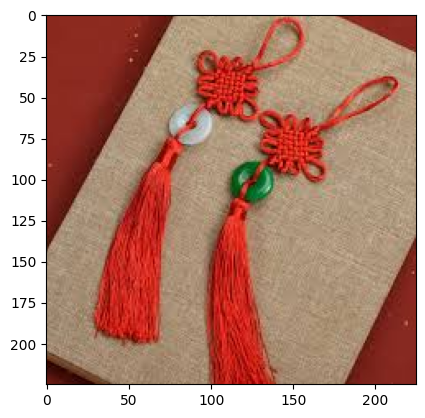

In [95]:
img = cv2.imread('TestingImages/knot.jpg', cv2.IMREAD_COLOR)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [96]:
resize = tf.image.resize(img, (244,244))

In [98]:
classes = ['Couplets', 'Dragons', 'Envelopes', 'FuCharacters', 'Chinese Knotting', 'Lanterns', 'Mooncakes', 'PaperCuttings', 'TangYuan']
prediction = new_model.predict(np.expand_dims(resize/244, 0))
predicted_class = np.argmax(prediction)
print(classes[predicted_class])

1/1 [==============================] - 0s 105ms/step
Chinese Knotting
